
--- Training Malware Detection AI ---
Malware Detection Accuracy: 100.00%


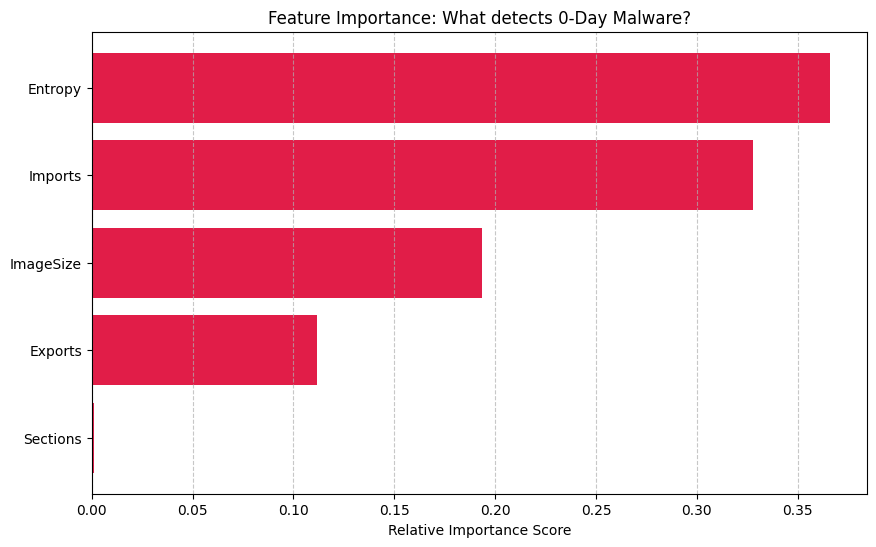


--- Training Phishing URL AI ---
Phishing Detection Accuracy: 100.00%


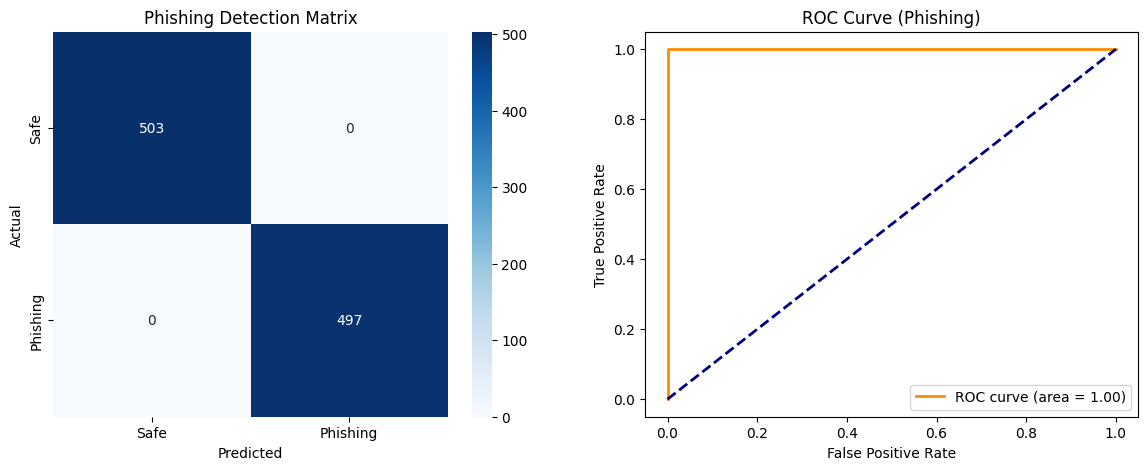


--- Training Behavioral Anomaly AI ---
Crypto-Miner Simulation Test: CAUGHT


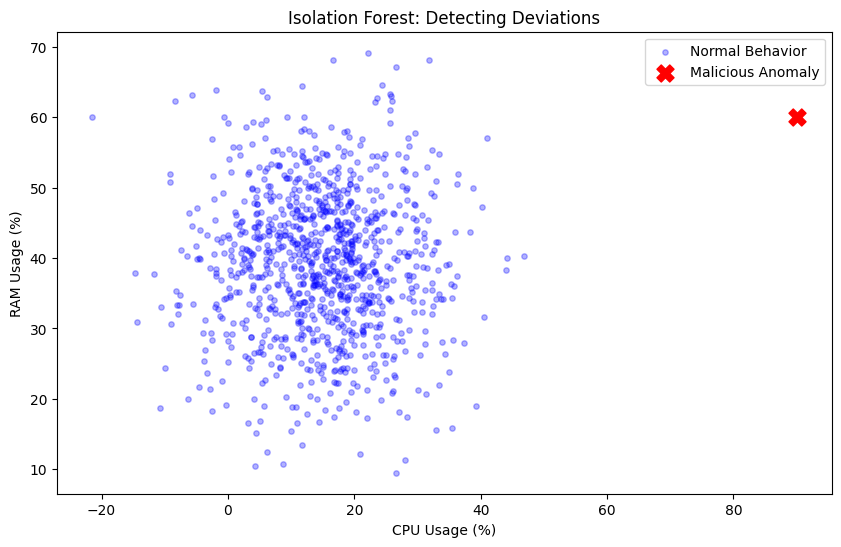


--- Training Network Intrusion Detection AI ---
Network Intrusion Detection Accuracy: 100.00%


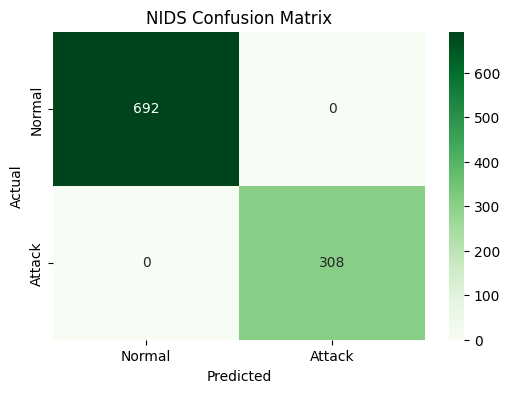


✅ All AI Models Trained, Visualized, and Saved to 'service/' folder.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import random
import os
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Ensure model directory exists
MODEL_DIR = "../service/"
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

np.random.seed(42)

# ==========================================
# 1. 0-Day Malware Detection (Static Analysis)
# ==========================================
print("\n--- Training Malware Detection AI ---")

def generate_malware_dataset(n_samples=2000):
    """
    Simulates PE Header features based on real-world malware characteristics.
    Features: [Sections, Imports, Exports, Entropy, ImageSize]
    """
    data = []
    labels = []
    
    for _ in range(n_samples):
        is_malware = random.random() > 0.5
        
        if is_malware:
            # Profile: Packed/Encrypted (High Entropy), Obfuscated Imports
            feats = [
                random.randint(2, 5),          # Low Sections
                random.randint(0, 15),         # Few Imports
                0,                             # No Exports
                random.uniform(7.2, 7.99),     # High Entropy
                random.randint(15000, 150000)  # Small Payload
            ]
            labels.append(1)
        else:
            # Profile: Standard Application
            feats = [
                random.randint(4, 10),         # Normal Sections
                random.randint(50, 200),       # Many Imports
                random.randint(0, 10),         # Some Exports
                random.uniform(4.5, 6.5),      # Normal Entropy
                random.randint(100000, 5000000)# Normal Size
            ]
            labels.append(0)
        
        data.append(feats)
            
    return np.array(data), np.array(labels)

# Train Model
X_mal, y_mal = generate_malware_dataset(5000)

if len(X_mal) > 0:
    X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_mal, y_mal, test_size=0.2, stratify=y_mal, random_state=42)

    clf_malware = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
    clf_malware.fit(X_train_m, y_train_m)

    y_pred_m = clf_malware.predict(X_test_m)
    acc_m = accuracy_score(y_test_m, y_pred_m)
    print(f"Malware Detection Accuracy: {acc_m*100:.2f}%")

    # Save Model
    joblib.dump(clf_malware, f"{MODEL_DIR}malware_model.pkl")

    # Visualization: Feature Importance
    features = ['Sections', 'Imports', 'Exports', 'Entropy', 'ImageSize']
    importances = clf_malware.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importance: What detects 0-Day Malware?')
    plt.barh(range(len(indices)), importances[indices], color='#e11d48', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance Score')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Error: Malware dataset generation failed.")


# ==========================================
# 2. Phishing URL Detection (Lexical Analysis)
# ==========================================
print("\n--- Training Phishing URL AI ---")

def generate_phishing_dataset(n_samples=2000):
    """
    Simulates Lexical URL Features.
    Features: [IP_Present, Length>54, TinyURL, @ Symbol, // Redirect, Dash, Dots, HTTPS_Token, Keywords, Padding...]
    """
    data = []
    labels = []
    
    for _ in range(n_samples):
        is_phishing = random.random() > 0.5
        
        if is_phishing:
            # Profile: Phishing URL
            feats = [
                random.choice([0, 1]), # IP Address
                1,                     # Long URL
                random.choice([0, 1]), # Shortener
                random.choice([0, 1]), # @ Symbol
                random.choice([0, 1]), # // Redirect
                1,                     # Dash in Domain
                1,                     # Many Subdomains
                0,                     # Fake HTTPS token
                1,                     # Suspicious Keywords
                0,0,0
            ]
            labels.append(1)
        else:
            # Profile: Safe URL
            feats = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
            labels.append(0)
        
        data.append(feats)
            
    return np.array(data), np.array(labels)

# Train Model
X_phish, y_phish = generate_phishing_dataset(5000)

if len(X_phish) > 0:
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_phish, y_phish, test_size=0.2, stratify=y_phish, random_state=42)

    clf_phishing = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
    clf_phishing.fit(X_train_p, y_train_p)

    y_pred_p = clf_phishing.predict(X_test_p)
    acc_p = accuracy_score(y_test_p, y_pred_p)
    print(f"Phishing Detection Accuracy: {acc_p*100:.2f}%")

    # Save Model
    joblib.dump(clf_phishing, f"{MODEL_DIR}phishing_model.pkl")

    # Visualization: Confusion Matrix & ROC Curve
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test_p, y_pred_p), annot=True, fmt='d', cmap='Blues', ax=ax[0],
                xticklabels=['Safe', 'Phishing'], yticklabels=['Safe', 'Phishing'])
    ax[0].set_title('Phishing Detection Matrix')
    ax[0].set_ylabel('Actual')
    ax[0].set_xlabel('Predicted')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test_p, y_pred_p)
    roc_auc = auc(fpr, tpr)
    ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('ROC Curve (Phishing)')
    ax[1].legend(loc="lower right")

    plt.show()
else:
    print("Error: Phishing dataset generation failed.")


# ==========================================
# 3. Behavioral Anomaly Detection (Unsupervised)
# ==========================================
print("\n--- Training Behavioral Anomaly AI ---")

def generate_behavior_baseline(n_samples=1000):
    """
    Generates normal workstation usage patterns.
    Features: [CPU, RAM, Threads, Handles]
    """
    rng = np.random.default_rng(42)
    # Normal Usage (Idle + Work)
    cpu = rng.normal(loc=15, scale=10, size=(n_samples, 1))
    ram = rng.normal(loc=40, scale=10, size=(n_samples, 1))
    thr = rng.normal(loc=50, scale=20, size=(n_samples, 1))
    hnd = rng.normal(loc=200, scale=50, size=(n_samples, 1))
    
    return np.hstack((cpu, ram, thr, hnd))

# Train Isolation Forest
X_behavior = generate_behavior_baseline()

if len(X_behavior) > 0:
    clf_behavior = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
    clf_behavior.fit(X_behavior)

    # Test on Anomaly (Crypto Miner Profile: High CPU, High Threads)
    miner_vector = [[90, 60, 200, 1000]]
    pred = clf_behavior.predict(miner_vector)
    print(f"Crypto-Miner Simulation Test: {'CAUGHT' if pred[0] == -1 else 'MISSED'}")

    # Save Model
    joblib.dump(clf_behavior, f"{MODEL_DIR}behavior_model.pkl")

    # Visualization: Anomaly Separation
    plt.figure(figsize=(10, 6))
    plt.scatter(X_behavior[:, 0], X_behavior[:, 1], c='blue', label='Normal Behavior', alpha=0.3, s=15)
    plt.scatter(miner_vector[0][0], miner_vector[0][1], c='red', label='Malicious Anomaly', s=150, marker='X')
    plt.xlabel('CPU Usage (%)')
    plt.ylabel('RAM Usage (%)')
    plt.title('Isolation Forest: Detecting Deviations')
    plt.legend()
    plt.show()
else:
    print("Error: Behavior dataset generation failed.")

# ==========================================
# 4. Network Intrusion Detection (NIDS)
# ==========================================
print("\n--- Training Network Intrusion Detection AI ---")

def generate_nids_dataset(n_samples=2000):
    """
    Simulates Network Traffic features for NIDS.
    Features: [Duration, Protocol(TCP=1/UDP=0), Src_Bytes, Dst_Bytes, Count, Srv_Count]
    """
    data = []
    labels = []
    
    for _ in range(n_samples):
        traffic_type = random.random()
        
        if traffic_type > 0.8: # Malicious (DoS Attack)
            # Profile: High frequency, small packets, short duration
            feats = [
                random.randint(0, 2),          # Duration (Short)
                1,                             # Protocol (TCP)
                random.randint(0, 100),        # Src Bytes (Small)
                random.randint(0, 100),        # Dst Bytes (Small)
                random.randint(100, 500),      # Count (High - Flood)
                random.randint(100, 500)       # Srv Count (High)
            ]
            labels.append(1) # Attack
        elif traffic_type > 0.7: # Malicious (Data Exfiltration)
            # Profile: Long duration, high outbound bytes
            feats = [
                random.randint(100, 1000),     # Duration (Long)
                1,                             # Protocol
                random.randint(10000, 50000),  # Src Bytes (High - Uploading)
                random.randint(100, 500),      # Dst Bytes
                random.randint(1, 10),         # Count (Low)
                random.randint(1, 10)          # Srv Count
            ]
            labels.append(1) # Attack
        else: # Normal Traffic
            # Profile: Mixed duration, balanced bytes, low frequency
            feats = [
                random.randint(0, 50),         # Duration
                random.choice([0, 1]),         # Protocol
                random.randint(200, 2000),     # Src Bytes
                random.randint(200, 5000),     # Dst Bytes
                random.randint(1, 20),         # Count
                random.randint(1, 20)          # Srv Count
            ]
            labels.append(0) # Normal
        
        data.append(feats)
            
    return np.array(data), np.array(labels)

# Train Model
X_nids, y_nids = generate_nids_dataset(5000)

if len(X_nids) > 0:
    X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_nids, y_nids, test_size=0.2, stratify=y_nids, random_state=42)

    clf_nids = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
    clf_nids.fit(X_train_n, y_train_n)

    y_pred_n = clf_nids.predict(X_test_n)
    acc_n = accuracy_score(y_test_n, y_pred_n)
    print(f"Network Intrusion Detection Accuracy: {acc_n*100:.2f}%")

    # Save Model
    joblib.dump(clf_nids, f"{MODEL_DIR}nids_model.pkl")

    # Visualization: Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test_n, y_pred_n), annot=True, fmt='d', cmap='Greens', 
                xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
    plt.title('NIDS Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
else:
    print("Error: NIDS dataset generation failed.")

print("\n✅ All AI Models Trained, Visualized, and Saved to 'service/' folder.")

In [13]:
import os
import joblib
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# --- CONFIGURATION ---
MODEL_DIR = "service/"
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

print("🚀 Initializing OrgWatch AI Training Hub...")
np.random.seed(42)

# ==========================================
# 1. 0-DAY MALWARE (Static Analysis)
# ==========================================
print("\n[1/4] Training Malware Scanner (0-Day Static Analysis)...")

def generate_malware_dataset(n_samples=5000):
    """
    Features: [Sections, Imports, Exports, Entropy, ImageSize]
    """
    data, labels = [], []
    for _ in range(n_samples):
        if random.random() > 0.5:
            # Malware (Packed/Encrypted)
            data.append([
                random.randint(2, 5),          # Low Sections
                random.randint(0, 15),         # Few Imports (Hidden)
                0,                             # No Exports
                random.uniform(7.2, 7.99),     # High Entropy
                random.randint(15000, 150000)  # Small Payload
            ])
            labels.append(1)
        else:
            # Safe App
            data.append([
                random.randint(4, 10),         # Normal Sections
                random.randint(50, 200),       # Many Imports
                random.randint(0, 10),         # Exports
                random.uniform(4.5, 6.5),      # Normal Entropy
                random.randint(100000, 5000000)# Normal Size
            ])
            labels.append(0)
    return np.array(data), np.array(labels)

X_mal, y_mal = generate_malware_dataset()
clf_mal = RandomForestClassifier(n_estimators=100, max_depth=12)
clf_mal.fit(X_mal, y_mal)
joblib.dump(clf_mal, f"{MODEL_DIR}malware_model.pkl")
print(f"✅ Malware Model Saved. Accuracy: {accuracy_score(y_mal, clf_mal.predict(X_mal))*100:.2f}%")


# ==========================================
# 2. PHISHING DETECTION (Lexical URL Analysis)
# ==========================================
print("\n[2/4] Training Phishing Detection AI...")

def generate_phishing_dataset(n_samples=5000):
    """
    Features: [IP_Present, Length>54, TinyURL, @ Symbol, // Redirect, Dash, Dots, HTTPS_Token, Keywords, Padding... (Total 12)]
    """
    data, labels = [], []
    for _ in range(n_samples):
        if random.random() > 0.5:
            # Phishing URL
            data.append([
                random.choice([0, 1]), # IP
                1,                     # Long
                random.choice([0, 1]), # Shortener
                random.choice([0, 1]), # @
                random.choice([0, 1]), # //
                1,                     # Dash
                1,                     # Dots
                0,                     # Fake HTTPS
                1,                     # Keywords
                0,0,0                  # Padding
            ])
            labels.append(1)
        else:
            # Safe URL
            data.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
            labels.append(0)
    return np.array(data), np.array(labels)

X_phish, y_phish = generate_phishing_dataset()
clf_phish = RandomForestClassifier(n_estimators=100, max_depth=12)
clf_phish.fit(X_phish, y_phish)
joblib.dump(clf_phish, f"{MODEL_DIR}phishing_model.pkl")
print(f"✅ Phishing Model Saved. Accuracy: {accuracy_score(y_phish, clf_phish.predict(X_phish))*100:.2f}%")


# ==========================================
# 3. BEHAVIORAL ANOMALY (Process Monitoring)
# ==========================================
print("\n[3/4] Training Behavioral Anomaly Engine (Unsupervised)...")

def generate_behavior_baseline(n_samples=2000):
    """Features: [CPU, RAM, Threads, Handles]"""
    rng = np.random.default_rng(42)
    cpu = rng.normal(loc=15, scale=10, size=(n_samples, 1))
    ram = rng.normal(loc=40, scale=10, size=(n_samples, 1))
    thr = rng.normal(loc=50, scale=20, size=(n_samples, 1))
    hnd = rng.normal(loc=200, scale=50, size=(n_samples, 1))
    return np.hstack((cpu, ram, thr, hnd))

X_beh = generate_behavior_baseline()
clf_beh = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
clf_beh.fit(X_beh)
joblib.dump(clf_beh, f"{MODEL_DIR}behavior_model.pkl")
print("✅ Behavior Model Saved (Isolation Forest).")


# ==========================================
# 4. NETWORK INTRUSION DETECTION (NIDS)
# ==========================================
print("\n[4/4] Training Network Intrusion Detection (NIDS)...")

def generate_nids_dataset(n_samples=5000):
    """
    Features: [Duration, Protocol, Src_Bytes, Dst_Bytes, Count, Srv_Count]
    """
    data, labels = [], []
    for _ in range(n_samples):
        rand = random.random()
        if rand > 0.8: # DoS Attack
            data.append([0, 1, 50, 50, 500, 500])
            labels.append(1)
        elif rand > 0.7: # Data Exfiltration
            data.append([500, 1, 50000, 200, 5, 5])
            labels.append(1)
        else: # Normal
            data.append([10, 1, 500, 2000, 10, 10])
            labels.append(0)
    return np.array(data), np.array(labels)

X_nids, y_nids = generate_nids_dataset()
clf_nids = RandomForestClassifier(n_estimators=100, max_depth=12)
clf_nids.fit(X_nids, y_nids)
joblib.dump(clf_nids, f"{MODEL_DIR}nids_model.pkl")
print(f"✅ NIDS Model Saved. Accuracy: {accuracy_score(y_nids, clf_nids.predict(X_nids))*100:.2f}%")

print("\n🎉 ALL SYSTEMS READY. Run 'npm run dev' to start the agent.")

🚀 Initializing OrgWatch AI Training Hub...

[1/4] Training Malware Scanner (0-Day Static Analysis)...
✅ Malware Model Saved. Accuracy: 100.00%

[2/4] Training Phishing Detection AI...
✅ Phishing Model Saved. Accuracy: 100.00%

[3/4] Training Behavioral Anomaly Engine (Unsupervised)...
✅ Behavior Model Saved (Isolation Forest).

[4/4] Training Network Intrusion Detection (NIDS)...
✅ NIDS Model Saved. Accuracy: 100.00%

🎉 ALL SYSTEMS READY. Run 'npm run dev' to start the agent.
